In [1]:
import numpy as np
import os
import glob
import shutil
import matplotlib.pyplot as plt
import json
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from IPython.display import Image
%matplotlib inline

# Lab 3: nonlinear Static Analysis

##Simulation data

In [23]:
def readDataL03(filename):
    
    file=open(filename,'r') 
    row = file.readlines()
    
    coord_set = range(403,600,5)
    
    #print(list(coord_set))
    
    step = []
    x = {}
    y = {}
    z = {}
    
    state = 0

    for line in row:
        strlist = line.split()
        if 'INCREMENT' in strlist and 'SUMMARY' in strlist:
            state = 1
        elif 'TOTAL' in strlist and state == 1:
            step.append(float(strlist[-1]))
            x[step[-1]] = []
            y[step[-1]] = []
            z[step[-1]] = []
            state = 2
        elif 'U2' in strlist and state == 2:
            state = 3
        elif len(strlist) == 7 and state == 3:
            if int(strlist[0]) in coord_set:
                #print(strlist)
                x[step[-1]].append(float(strlist[-3]))
                y[step[-1]].append(float(strlist[-2]))
                z[step[-1]].append(float(strlist[-1]))

            elif int(strlist[0]) > coord_set[-1]:
                state = 0
                
    return np.array(step), x, y, z


In [24]:
dirs = glob.glob("../Lab03_abaqus/s*")

sim_data = {}

for di in dirs:
    test = di.split('/')[-1]
    a, b, c, d = readDataL03(di+"/03_"+test+".dat")
        
    sim_data[test] = [a,b,c,d]

In [32]:
def readDataL03_lin(filename):
    
    file=open(filename,'r') 
    row = file.readlines()
    
    coord_set = range(413,614,5)
    
    #print(list(coord_set))
    
    step = []
    x = {}
    y = {}
    z = {}
    
    state = 0

    for line in row:
        strlist = line.split()
        if 'INCREMENT' in strlist and 'SUMMARY' in strlist:
            state = 1
        elif 'Increment' in strlist and 'Time' in strlist:
            step.append(float(strlist[-1]))
            x[step[-1]] = []
            y[step[-1]] = []
            z[step[-1]] = []
            state = 2
        elif 'CNTLVR' in strlist and state == 2:
            if int(strlist[1]) in coord_set:
                #print(strlist)
                x[step[-1]].append(float(strlist[-3]))
                y[step[-1]].append(float(strlist[-2]))
                z[step[-1]].append(float(strlist[-1]))

            elif int(strlist[1]) > coord_set[-1]:
                state = 0
                
    return np.array(step), x, y, z


In [34]:
a, b, c, d = readDataL03_lin("../Lab03_abaqus/lin/test.rpt")
sim_data['lin'] = [a,b,c,d]

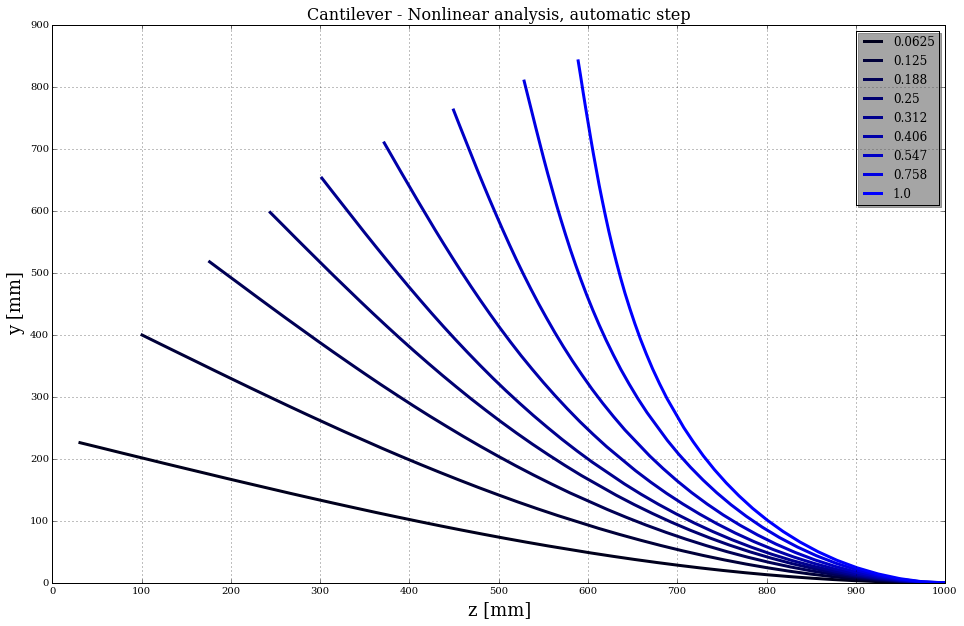

In [40]:
atype = 'st1auto'

plt.figure(figsize=(16,10), dpi=300)

steps = sim_data[atype][0]
xd = sim_data[atype][1]
yd = sim_data[atype][2]
zd = sim_data[atype][3]

for i, step in enumerate(steps):
    plt.plot(zd[step],yd[step], '-', lw=3, label=step, color= (0.0, 0.0, (i+1)/len(steps)))


plt.xlim([0,1000])
plt.ylim([0,900])
plt.xticks(np.arange(0.0,1001,100))
plt.yticks(np.arange(0.0,901,100))
plt.title('Cantilever - Nonlinear analysis, automatic step', fontsize=16)
plt.xlabel(r'z [mm]', fontsize=18)
plt.ylabel(r'y [mm]', fontsize=18)
plt.legend(loc='upper right', shadow=True)
plt.grid()
plt.savefig('Lab03_st1auto.jpg')

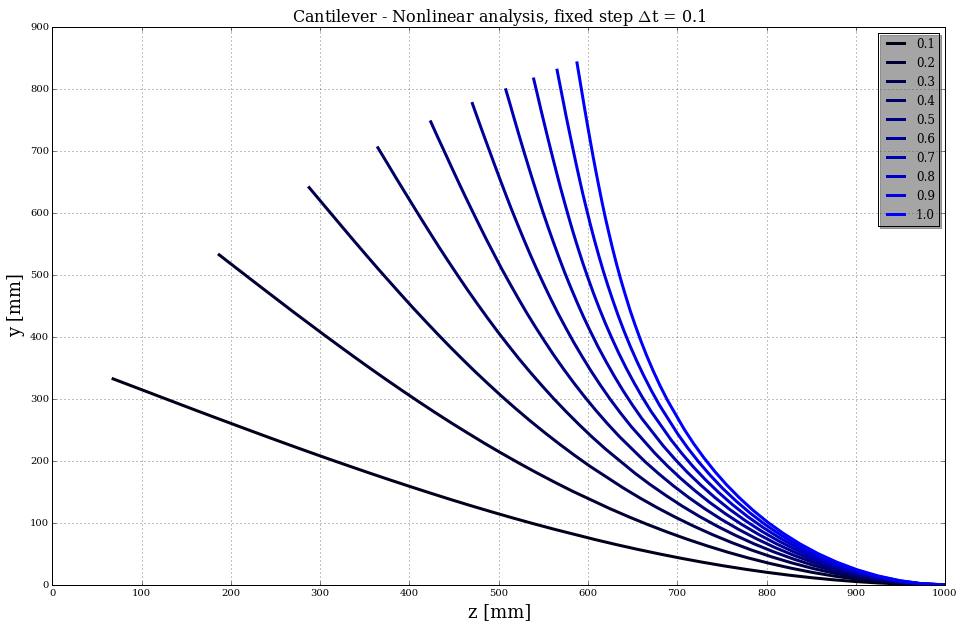

In [39]:
atype = 'st01'

plt.figure(figsize=(16,10), dpi=300)

steps = sim_data[atype][0]
xd = sim_data[atype][1]
yd = sim_data[atype][2]
zd = sim_data[atype][3]

for i, step in enumerate(steps):
    plt.plot(zd[step],yd[step], '-', lw=3, label=step, color= (0.0, 0.0, (i+1)/len(steps)))


plt.xlim([0,1000])
plt.ylim([0,900])
plt.xticks(np.arange(0.0,1001,100))
plt.yticks(np.arange(0.0,901,100))
plt.title('Cantilever - Nonlinear analysis, fixed step $\Delta$t = 0.1', fontsize=16)
plt.xlabel(r'z [mm]', fontsize=18)
plt.ylabel(r'y [mm]', fontsize=18)
plt.legend(loc='upper right', shadow=True)
plt.grid()
plt.savefig('Lab03_st01.jpg')

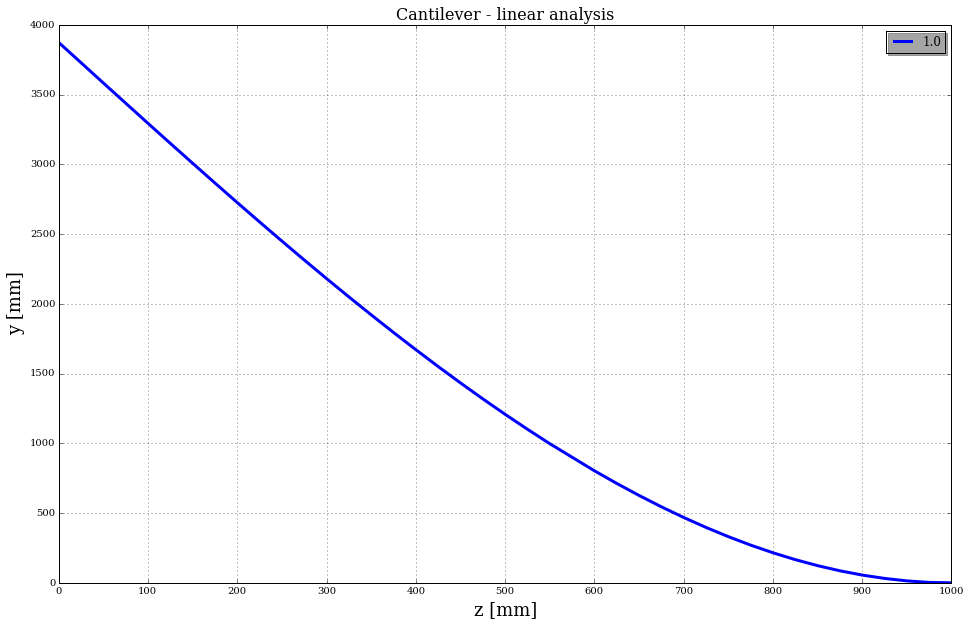

In [41]:
atype = 'lin'

plt.figure(figsize=(16,10), dpi=300)

steps = sim_data[atype][0]
xd = sim_data[atype][1]
yd = sim_data[atype][2]
zd = sim_data[atype][3]

for step in steps:
    plt.plot(zd[step],yd[step], '-', lw=3, label=step)

plt.xlim([0,1000])
plt.ylim([0,4000])
plt.xticks(np.arange(0.0,1001,100))
plt.yticks(np.arange(0.0,4001,500))
plt.title('Cantilever - linear analysis', fontsize=16)
plt.xlabel(r'z [mm]', fontsize=18)
plt.ylabel(r'y [mm]', fontsize=18)
plt.legend(loc='upper right', shadow=True)
plt.grid()
plt.savefig('Lab03_lin.jpg')

#Comparison

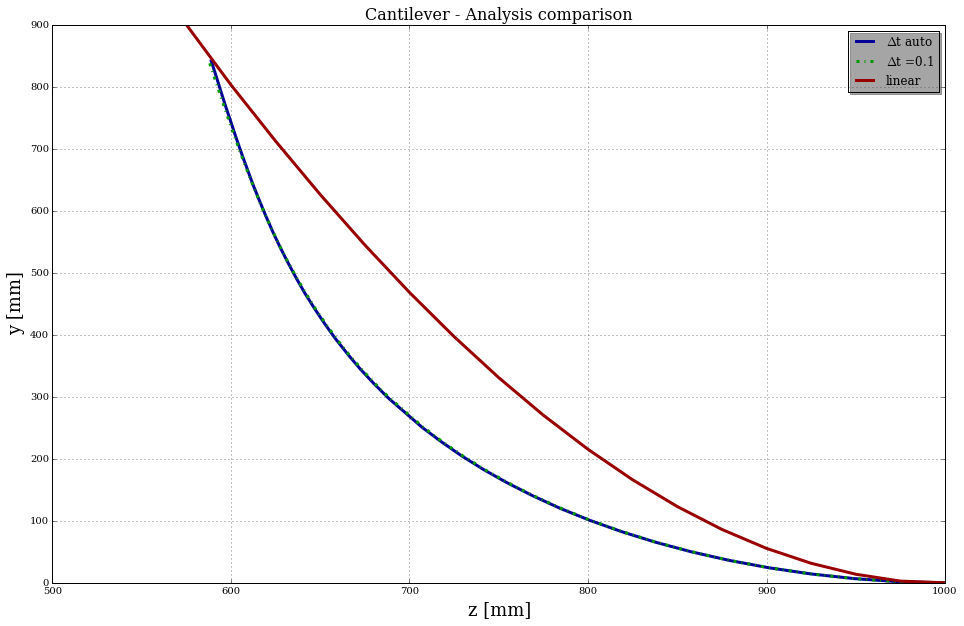

In [47]:
plt.figure(figsize=(16,10), dpi=300)


plt.plot(sim_data['st1auto'][3][1.0],sim_data['st1auto'][2][1.0], '-', lw=3,\
         label=r'$\Delta$t auto', color= (0.0, 0.0, 0.6))

plt.plot(sim_data['st01'][3][1.0],sim_data['st01'][2][1.0], '-.', lw=3,\
         label=r'$\Delta$t =0.1', color= (0.0, 0.6, 0.0))

plt.plot(sim_data['lin'][3][1.0],sim_data['lin'][2][1.0], '-', lw=3,\
         label=r'linear', color= (0.6, 0.0, 0.0))


plt.xlim([500,1000])
plt.ylim([0,900])
plt.xticks(np.arange(500.0,1001,100))
plt.yticks(np.arange(0.0,901,100))
plt.title('Cantilever - Analysis comparison', fontsize=16)
plt.xlabel(r'z [mm]', fontsize=18)
plt.ylabel(r'y [mm]', fontsize=18)
plt.legend(loc='upper right', shadow=True)
plt.grid()
plt.savefig('Lab03_comp.jpg')